# Customer Churn Prediction : Subscription Service Retention Analysis

**Objective :** To predict Customer Churn and identify high Risk to Improve Retention Stratigies.

**1 Loading libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
import plotly.express as px

import missingno as msno

In [2]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn import metrics





In [5]:
# LOADING THE DATA 

df = pd.read_csv('archive/archive.csv')

**2 LETS UNDERSATND THE DATA**

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*The Dataset gives general information like:*

*  Customers who left service last month :  Column Churn
*  Services that are taking : phoneService ,MultipleLines ,nternetService,OnlineSecurity,DeviceProtection,StreamingTV
*  Account Information : how long they taking Servies or  connected with us :  contract, payment method, paperless billing, monthly charges, and total      charges
*  Customer Demography :gender, age range

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.shape

(7043, 21)

**3 FIND MISSING VALUES**

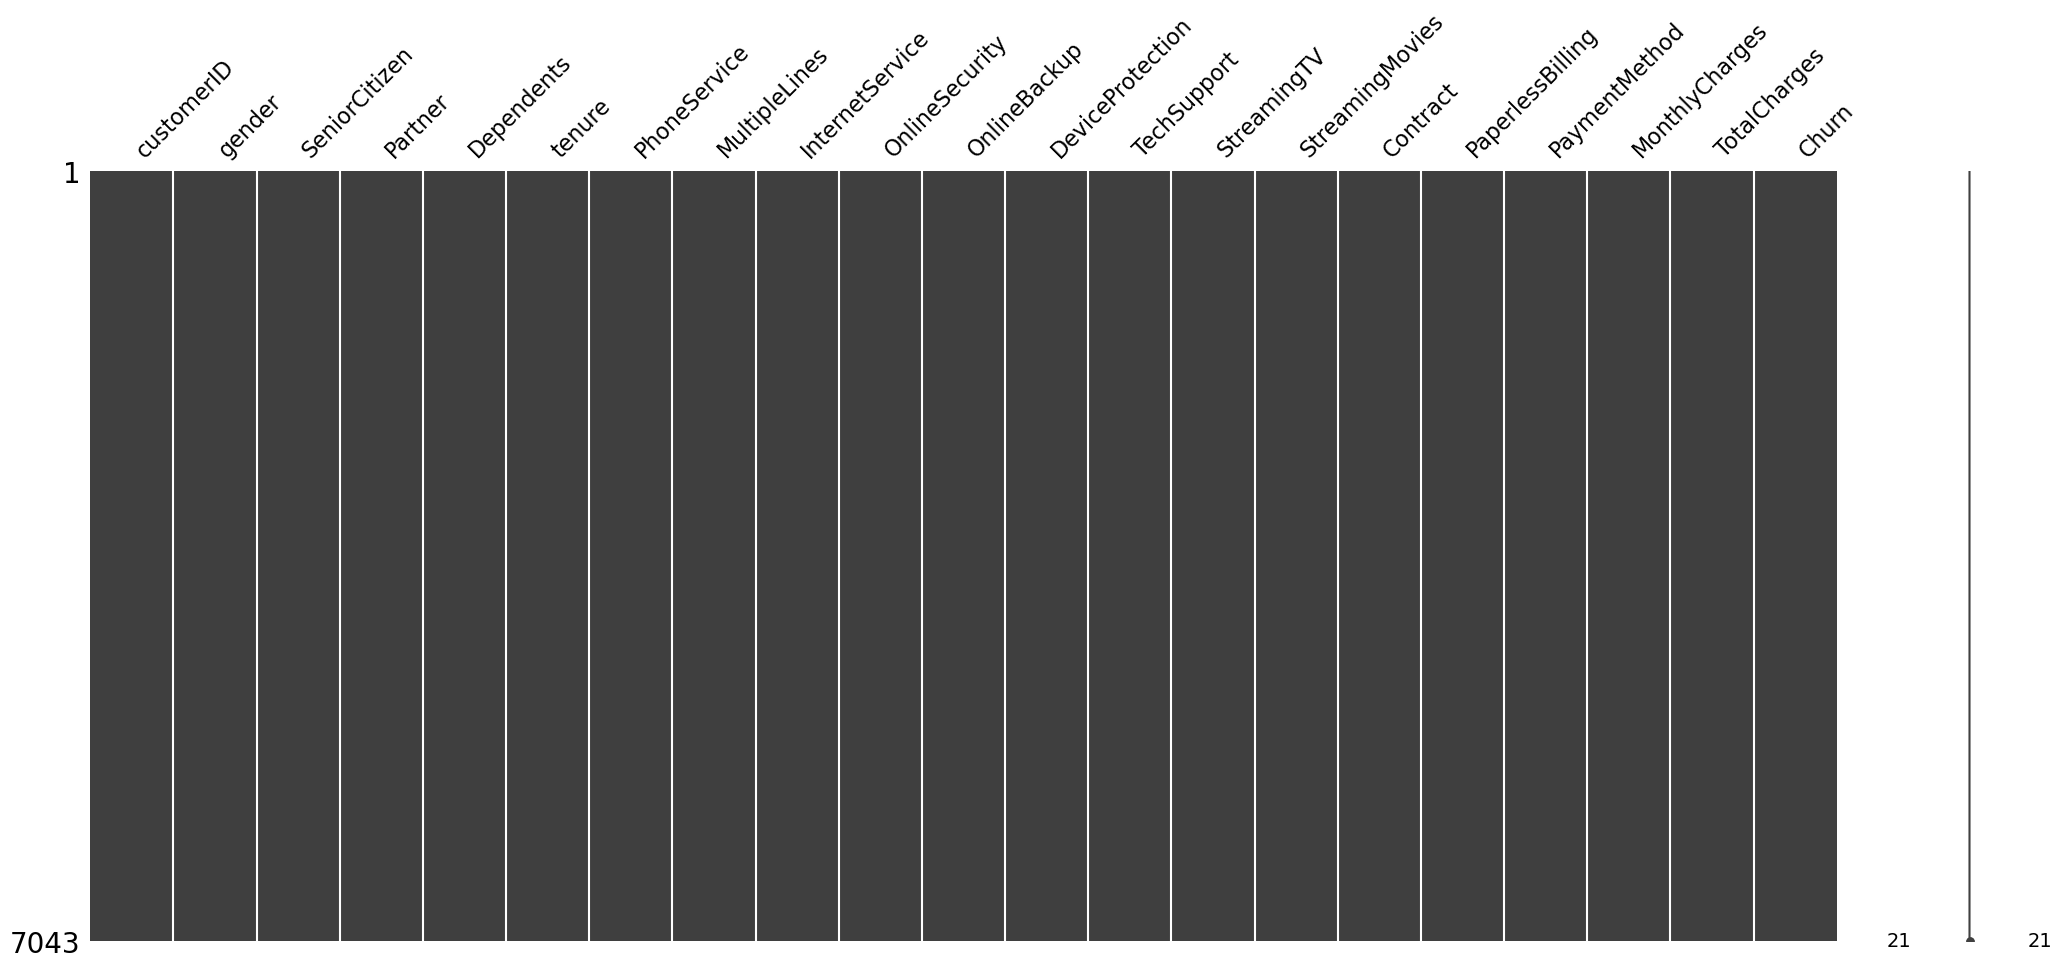

In [9]:
msno.matrix(df)                                  # see miising values by matrix
plt.show()                                        # #df.isnull().sum()    ( use this also )


* Help of matrix above Visualization  show that there is no missing values in data set .

**4 MANIPULATION OF DATA**

* Remove useless column 

In [10]:
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Convert TotalCharges datatype to numeric

In [11]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges ,errors ='coerce')

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* There are 11 missing value in Total charges lets see or how we handle it

In [12]:
df.loc[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Above data shows us that there are 11 rows of TotaCharges that have missing values ,
* But together we find that tenure have zero values for this but Monthly chages have data
  
* lets see that tenure may have more zero values

In [13]:
df.loc[df['tenure']==0]                    # .index     so we get only index 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* same only 11 rows missing values there are no additional rows , so dlt them will not effect

In [14]:
df.drop(df.loc[df['tenure']==0].index,axis=0,inplace=True)
df.loc[df['tenure']==0].index

Index([], dtype='int64')

* Now fill the missing values of TotalCharges
* According to ToatalCharges values here we fill missing values by mean Of TotalCharges Values

In [15]:
#mean_=df['TotalCharges'].mean()
#df['TotalCharges'].fillna(mean_)

df.fillna(df['TotalCharges'].mean())

#df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
#df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* Now there are no missing values in our data

In [17]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
df["SeniorCitizen"]= df["SeniorCitizen"].replace({0: "No", 1: "Yes"})              # Here we use replace as of map. bcoz replace changes values you
df.head()                                                                          # specify leaves everything else as it was.( use map is also ok)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.describe(include="all")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3549,5890,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [20]:
df["InternetService"].describe(include="all")

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

* we get all scenario of using InternetService here, fibre optic service taken large number in btwn them 

**5 DATA VISUALIZATION**

In [21]:
from plotly.subplots import make_subplots
import plotly.express as px


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(px.pie(df, names='gender', title="Gender" ).data[0], row=1, col=1)
fig.add_trace(px.pie(df, names='Churn', title="Churn").data[0], row=1, col=2)

fig.update_layout(title_text="Gender and Churn Distributions")
fig.show()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




* 26.6% customer are  left 


In [22]:
print(df['gender'].value_counts())

gender
Male      3549
Female    3483
Name: count, dtype: int64


* we get total no of Male and female , IN btwn them
 
* We find how many are male and Female who churn

In [23]:
#df.groupby('gender')['Churn'].value_counts()              

df.groupby(['gender', 'Churn']).size().unstack()                     # makes clean table 

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


* Key Insight: Gender vs Churn
* After analyzing the relationship between **Gender** and **Customer Churn**, we found that:
* **Gender does not impact Churn:** The churn rate for both Males and Females is approximately  same .
* **Conclusion:** Gender have no role to left/churn

In [24]:

color_map = {"Yes": 'deepskyblue', "No": 'tomato'}

fig = px.histogram(df, 
                   x="SeniorCitizen", 
                   color="Churn", 
                   barmode="group",
                   title="Churn on Basis of Senior Citizens",
                   color_discrete_map=color_map,
                   text_auto=True) 

fig.update_layout(
    width=800, 
    height=500, 
    xaxis_title="Is the Customer a Senior Citizen?",
    yaxis_title="Count of Customers",
    legend_title_text="Churn"
)

fig.show()


*  W.r.t to NON senior , senior citizens are very less
*  Senior Citizens are more likely to churn than non-seniors.
*  So marketing team have make special plans for **Retention** senior citizens

In [25]:

fig=px.histogram(df,x="Partner" , color="Churn" ,barmode="group" ,
                  color_discrete_map={"Yes": '#00CC96' ,"No" : '#B6E880'},
                  text_auto=True,
                  title="Churn on Basis of Partner")

fig.update_layout(
    width=800, 
    height=500, 
        bargap=0.4,

    xaxis_title ="Partner",
    yaxis_title = "Count of Partner",
    legend_title_text="Churn"
)
fig.show()

**Insight:** Lack of a partner is a key indicator of Churn risk.

In [26]:

fig=px.histogram(df,x="Churn" , color="Dependents" ,
                  color_discrete_map={"Yes": '#ff7f0e' ,"No" : '#1f77b4'},
                  title="Churn on Basis of Dependents")

fig.update_layout(
    height=500,
    width=700,


    xaxis_title ="Churn",
    yaxis_title = "Count of Dependents",
    legend_title_text="Dependents"
)
fig.show()

* Customers who are not Dependents are more likely to churn .
* But Dependenst are very less percent likely to churn.

In [27]:
fig=px.histogram(df,x="Churn" , color="PhoneService" ,text_auto=True,
                  color_discrete_map={"Yes": 'crimson' ,"No" : 'seagreen'},
                  title="Churn on Basis of PhoneService")

fig.update_layout(
    height=500,
    width=500,

    legend_title_text="PhoneService"
)
fig.show()

* Customers who  Have  not taken Phone Servive are very less .
* And out of them 25% are likely to churn
*  Major churn who are taking Phone Service .

In [28]:
types = df['MultipleLines'].unique()
print(types)

['No phone service' 'No' 'Yes']


In [29]:

type_counts = df['MultipleLines'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

fig = px.pie(type_counts, 
             values='Count', 
             names='Type', 
             title='Distribution of Multiple Lines Types',
             hole=0.3,
             color_discrete_sequence=px.colors.sequential.Teal) 

fig.update_traces(textinfo='percent+label')
fig.show()

In [30]:
fig=px.histogram(df,x="MultipleLines" , color="Churn" ,text_auto=True,
                  color_discrete_map={"Yes": '#E74C3C' ,"No" : '#BDC3C7',},
                  barmode='group',

                  title="Churn on Basis of MultipleLines")

fig.update_layout(
    height=500,
    width=800,

    legend_title_text='Churn'
)
fig.show()

* Customers who  have multipleslines or not is not directly effect on Churn
* Customers Who have no phone service is very less ,  Out of them 1/3 are likely to Churn

In [31]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [32]:
fig=px.histogram(df,x="InternetService" ,color="Churn" , 
                 color_discrete_map={"Yes": 'crimson' ,"No" : 'seagreen'},
                title="Churn on Basis of InternetService",
                text_auto=True)

fig.update_layout(
    height=500,
    width=800,

    legend_title_text='Churn'
)
fig.show()

* Fibreoptic customers are Churn very High as Compare DSL Service
* Fibre Optic is the premimun Product , But customers  churn in high  rate.
* Customers who have no INternet service are less churn



In [33]:

# Create a pivot table showing Churn Rate
pivot = df.pivot_table(index='PhoneService', 
                       columns='InternetService', 
                       values='Churn', 
                       aggfunc=lambda x: (x == 'Yes').mean() * 100)

fig = px.imshow(pivot, 
                text_auto=".1f", 
                aspect="auto",
                color_continuous_scale='Reds',
                labels=dict(x="InternetService", y=" PhoneService", color="Churn %"),
                title="Churn Probability Matrix ")

fig.update_layout(
    width=800,
    height=500,

)

fig.show()

In [34]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [35]:
fig = px.histogram(df, 
                   x="Contract", 
                   color="Churn",
                   barmode="group",
                   histnorm='percent', 
                   category_orders={"Contract": ["Month-to-month", "One year", "Two year"]},
                   color_discrete_map={"Yes": "#E74C3C", "No": "#2ECC71"},
                   title=" Churn Probability by Contract Type")

fig.update_layout(
    height=500,
    width=1000,
    yaxis_title="Percentage within Group (%)",
    bargap=0.2
)

fig.show()

**KEY insights :** 88% percent of churn customers belong to month-to-month contract  .
* Users who opted for yearly subscriptions demonstrated higher retention and were less prone to churn, highlighting the value of long-term plans in building user loyalty.


In [36]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [37]:

# Create a cross-tabulation table
pivot_table = pd.crosstab(df['PaymentMethod'], 
                          columns="Churn",
                          values=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0), 
                          aggfunc='mean') * 100

fig = px.imshow(pivot_table,
                text_auto=".1f", 
                color_continuous_scale='Reds',
                title="Churn Rate %  Payment Method")


fig.show()

* Customers using **Electronic Check** have significantly high Churn .
* Manual payments require the customer to **decide** to pay every month. This gives them a monthly opportunity to rethink their subscription or switch to a competitor.

**Trend Follows from previous  visualization**  Danger Zone are 
* Contract: Month-to-Month
* Internet: Fiber Optic
* Payment: Electronic Check



* If a customer has all three of these, their probability of leaving is likely highest . 

In [38]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [39]:

fig = px.box(df, 
             x="Churn", 
             y="tenure", 
             color="Churn",
             color_discrete_map={"Yes": "#E74C3C", "No": "#2ECC71"},
             title="Tenure VS Churn")


fig.update_layout(width=1000,
                  height=500,
                 yaxis_title='Tenure(Month)')


fig.show()

* New Customers btwn 4 to 12 month are More Likely to Churn
* If a customers stays 24 months  is more likely to stay  long

In [40]:
fig = px.box(df, 
             x="Churn", 
             y="MonthlyCharges", 
             color="Churn",
             points="all",                                                        # Shows individual customers on the side
             color_discrete_map={"Yes": "#E74C3C", "No": "#2ECC71"},
             title="Monthly Charges: Statistical Range by Churn Status")

fig.update_layout(width=1000, height=500,plot_bgcolor='white')


fig.show()

**INSIGTHS** Red VS Green :
* Red Box is on upper side -> Hight Monthly charges are likely to Churn
* Green Box is Big   -> Its mean who satyed  have varity of plans ,and low prices customers are more loyal .
* Green and Red overlap  -> This is **Danger Zone** where both types of Customers  exist , But dott  shows that more are likey to churn.

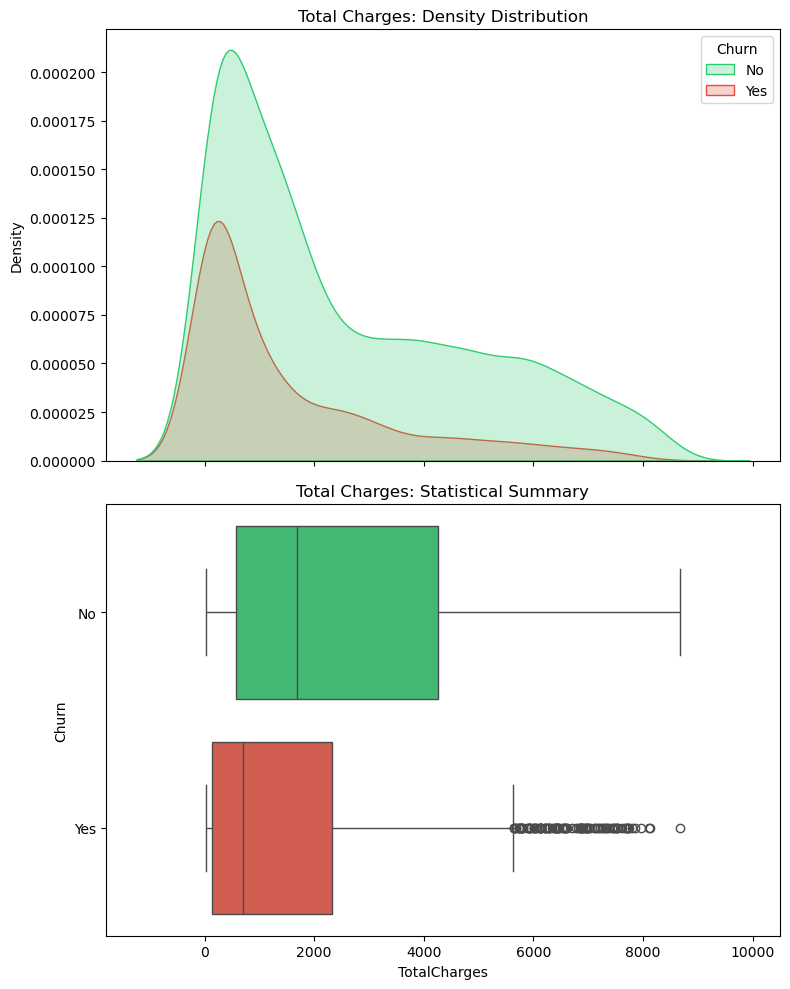

In [41]:

# Create the vertical stack
fig, (ax_kde, ax_box) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# 1. Top Plot: KDE
sns.kdeplot(df, x='TotalCharges', hue='Churn', fill=True, 
            palette={"Yes": "#E74C3C", "No": "#2ECC71"},
           ax=ax_kde)

ax_kde.set_title("Total Charges: Density Distribution")

# 2. Bottom Plot: Box Plot
sns.boxplot(data=df, x='TotalCharges', y='Churn', hue='Churn',
            palette={"Yes": "#E74C3C", "No": "#2ECC71"}, ax=ax_box)
ax_box.set_title("Total Charges: Statistical Summary")

plt.tight_layout()
plt.show()

* Early Loss: The sharp KDE peak near $0 proves most churners leave before the company breaks even on low costs.
* Loyal customers have a much wider "Total Charges" spread, representing the stable long-term revenue your business depends on.

* High-Value Risk: The outliers in the "Yes" box show that even long-term veterans quit; these rare but expensive losses signal competitive poaching or service failure.
* Action: Focus retention on the first $500 of spending to prevent the "Early Exit" spike seen in your density curve.

**6 DATA PREPROCESSING**

In [42]:
# SPLIT Dataset into Independent and Dependent :

X = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, shuffle=True, stratify=y)

In [44]:
le = LabelEncoder()

#  Identify categorical columns
# We only want to encode columns that are 'object' type
cat_cols = X_train.select_dtypes(include=['object']).columns

# 3. Loop through and transform
for col in cat_cols:
    # We 'fit' on training to learn the categories
    X_train[col] = le.fit_transform(X_train[col])
    
    # We 'transform' test data using the SAME rules from training
    X_test[col] = le.transform(X_test[col])

print("Encoding complete. All data is now numerical.")

Encoding complete. All data is now numerical.


In [45]:
print(X_train.dtypes)

gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [46]:
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)

X_test_scaled= scaler.transform(X_test)

print("Scaling complete! Your data is now 'balanced' and ready for the AI.")

Scaling complete! Your data is now 'balanced' and ready for the AI.


**7 MACHINE LEARNING MODEL**

**1. Random Forest**

In [47]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_features="sqrt",
    max_leaf_nodes=30,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

model_rf.fit(X_train ,y_train)         # train the model

y_pred=model_rf.predict(X_test)        # Make Prediction

print("Overall Accuracy:" , accuracy_score(y_test, y_pred))

Overall Accuracy: 0.8109004739336493


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1549
         Yes       0.70      0.50      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



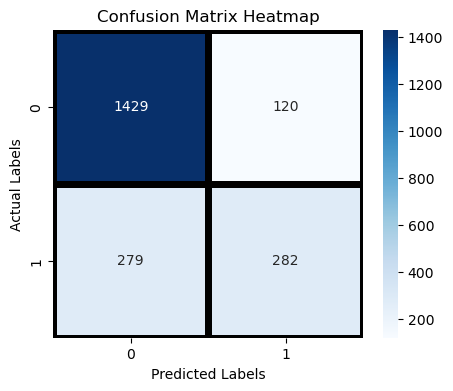

In [49]:
plt.figure(figsize=(5,4))

sns.heatmap(confusion_matrix(y_test , y_pred) ,annot=True, fmt='d', cmap='Blues',linecolor="k" ,linewidths=5)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22428\61843553.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




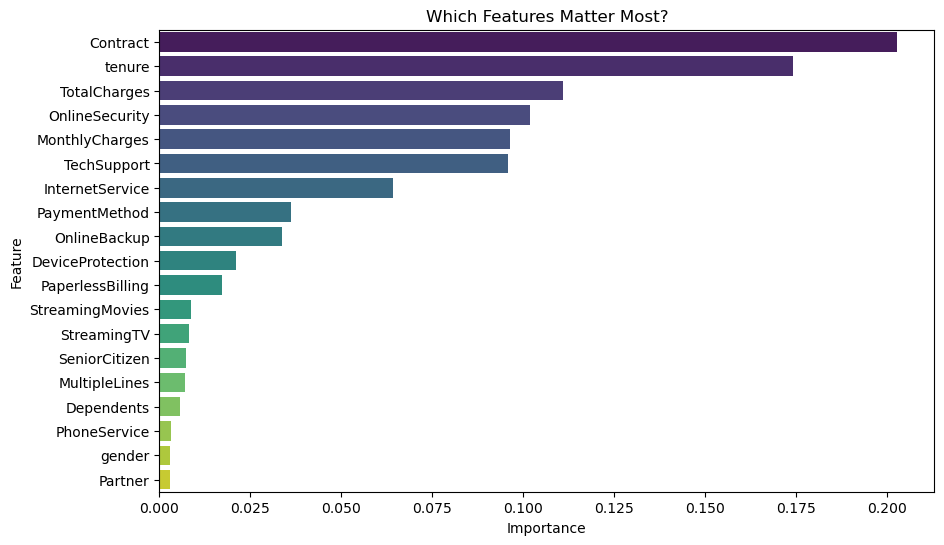

In [50]:
# 1. Get the scores from your model
importances = model_rf.feature_importances_

# 2. Match them with your column names
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort them so the most important is on top
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Which Features Matter Most?')
plt.show()

**Feature Importance**
* High Score: The model relied heavily on this column to make its guess.
* Low Score: The model mostly ignored this column; it didn't provide much "signal."

**# Hyperparameter Tunning**


In [51]:
parameter = {                                                                                       #  Define the 'Menu' of options
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced', None]
}
grid_search = GridSearchCV(estimator=model_rf, param_grid=parameter, cv=5, scoring='f1')           #  Set up the search

grid_search.fit(X_train, y_train)                                                                  #  Find the best settings


d:\anac\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\anac\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anac\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anac\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "d:\anac\Lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_leaf_nodes=30,
                                              n_estimators=300, n_jobs=-1,
                                              oob_score=True, random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [52]:
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Params: {grid_search.best_params_}")

Best Score: nan
Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}


In [53]:
final_model = RandomForestClassifier(
    class_weight='balanced', 
    max_depth=10, 
    n_estimators=100, 
    random_state=42
)

final_model.fit(X_train, y_train)

y_pred_new = final_model.predict(X_test)

# 4. Compare the new report
print(accuracy_score(y_test, y_pred_new))


0.771090047393365


In [54]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

          No       0.89      0.79      0.84      1549
         Yes       0.55      0.72      0.62       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110



**Insight:** This tells us that  data is "Imbalanced." Without hypertunning, the model would always be biased. By balancing the weights, level up playing field, which is  Macro Average F1-score improved.

In [55]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'optimized_random_forest.pkl')

# To load it back later:
# loaded_model = joblib.load('optimized_random_forest.pkl')

['optimized_random_forest.pkl']

**2. Logistic Regression**

In [56]:
model_lr=LogisticRegression()

model_lr.fit(X_train_scaled ,y_train)

y_predict_lr=model_lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:" ,accuracy_score(y_test ,y_predict_lr))

Logistic Regression Accuracy: 0.8090047393364929


In [57]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1549
         Yes       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



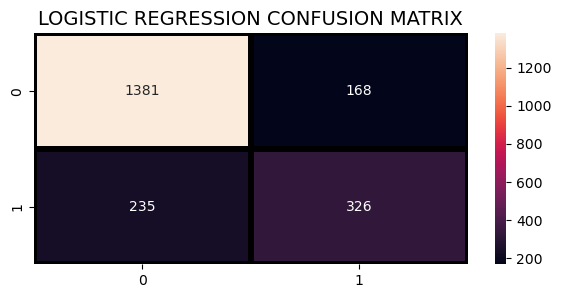

In [58]:
plt.figure(figsize=(7,3))
sns.heatmap(confusion_matrix(y_test, y_predict_lr),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

* From the confusion matrix we can see that: There are total 1381+168=1549 actual non-churn values and the algorithm predicts 1381 of them as non churn and 168 of them as churn. While there are 235+326=561 actual churn values and the algorithm predicts 235  of them as non churn values and 326 of them as churn values.

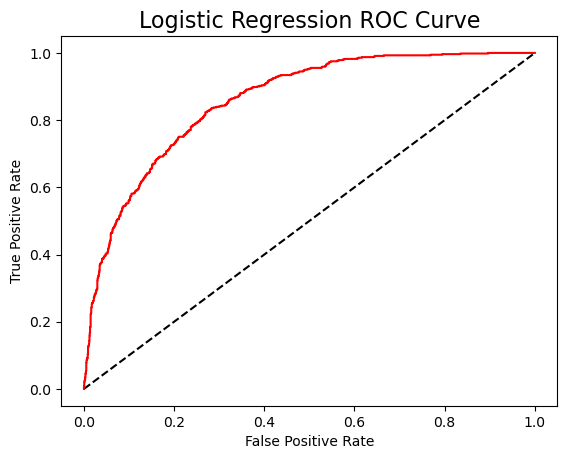

The model's separation power is: 85.84%


In [59]:
y_pred_prob = model_lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob ,pos_label='Yes')
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

auc = roc_auc_score(y_test, y_pred_prob)
print(f"The model's separation power is: {auc:.2%}")


**Insight comes from the Area Under the Curve (AUC).**
* Our model achieved an AUC of 85.54. This indicates that there is an 85.54% chance that the model will be able to distinguish between a customer who will churn ('Yes') and a customer who will stay ('No').
* Anything above 0.80 is generally considered a "Strong" classifier for business decisions.

**Hypertunning Parameter**

In [60]:
parameter = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1' ,'l2','elasticnet'],
    'max_iter':[100,200,300]
}
grid_search_lr = GridSearchCV(
    estimator=model_lr, 
    param_grid=parameter, 
    cv=5, 
    scoring='accuracy'
)

grid_search_lr.fit(X_train_scaled, y_train)

d:\anac\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anac\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anac\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anac\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [61]:
print(grid_search_lr.best_params_)


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [62]:
print(grid_search_lr.best_score_)


0.800283727456564


**3. Train With XGBoost Using GRID Search**

In [63]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],                                                              # Percentage of data used per tree
}
num_neg = (y_train == 'No').sum()
num_pos = (y_train == 'Yes').sum()
ratio = num_neg / num_pos

xgb = XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss')                       # scale_pos_weight helps with the 'Yes/No' imbalance

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='roc_auc',                                                                        # We optimize for the curve!
    cv=3,
    verbose=1
)

# Map labels to 0 and 1 before training
y_train_num = y_train.map({'No': 0, 'Yes': 1})

grid_xgb.fit(X_train, y_train_num)                                         

y_pred_xgb=grid_xgb.predict(X_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [64]:
print("Best Parameters:", grid_xgb.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [65]:
print("Best AUC Score:" ,grid_xgb.best_score_)

Best AUC Score: 0.8337220797986351


In [66]:
#print(classification_report(y_test, y_pred_xgb))    # showing error

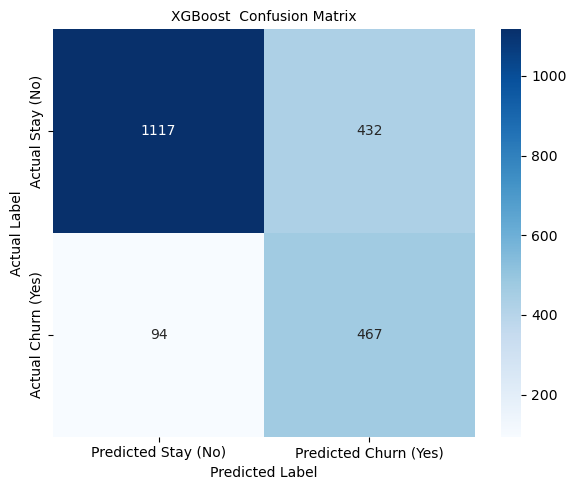

In [67]:
y_test_num = y_test.map({'No': 0, 'Yes': 1})

cm = confusion_matrix(y_test_num, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Stay (No)', 'Predicted Churn (Yes)'],
            yticklabels=['Actual Stay (No)', 'Actual Churn (Yes)'])

plt.title('XGBoost  Confusion Matrix', fontsize=10)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

plt.show()

In [68]:
TP = cm[1,0] # Top-Left
TN = cm[0,1] # Bottom-Right
FP = cm[0,0] # Bottom-Left  
FN = cm[1,1] # Bottom-Right

* Look at the bottom-left square (False Negatives).  it's low    -> Good for model
* From the confusion matrix we can see that: There are total 1117+432=1549 actual non-churn values and the algorithm predicts 1117 of them as non churn and 432 of them as churn. While there are 94+467=561 actual churn values and the algorithm predicts 94 of them as non churn values and 324 of them as churn values.

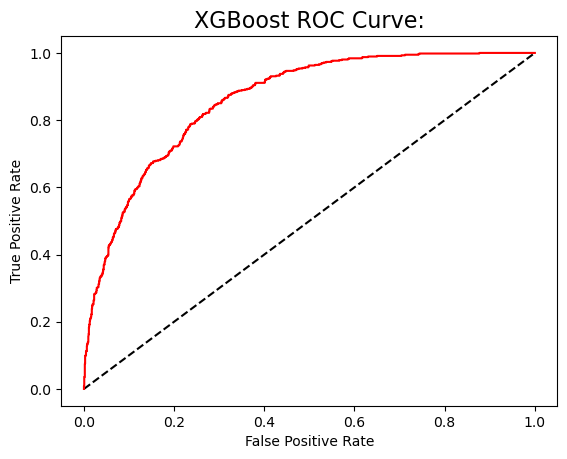

The model's separation power is: 86.02%


In [69]:
y_test_num = y_test.map({'No': 0, 'Yes': 1})
y_xgb_prob = grid_xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_num, y_xgb_prob )

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve:',fontsize=16)
plt.show();

auc = roc_auc_score(y_test_num, y_xgb_prob)
print(f"The model's separation power is: {auc:.2%}")


**The Separation Power (ROC-AUC)** With an AUC of  86.02%, the XGBoost model shows strong "separation power."
* If we randomly pick one person who churned and one who stayed, the model will correctly identify the churner 86 out of 100 times.
* Even  the score is close to last one in **Random Forest**  XGBoost often provides a better "fit" for non-linear behaviors (like a customer whose churn risk suddenly spikes only when both their 'Monthly Charges' are high AND they are on a 'Month-to-month' contract).

* "I chose XGBoost because I wanted to optimize the trade-off between Precision and Recall. In churn prediction, the cost of a False Negative is much higher than a False Positive, so I tuned the model to favor Recall."

**PROJECT SUMMARY: Customer Churn Prediction >-------------------------------------------------------------<**

**Problem** The goal was to predict which customers are likely to leave the company (Churn). High churn RATE mean revenue loss, and to get new Customer 5x more expensive than to retain an existing one.

* The Best Model: XGBoost is the final choice due to its superior Recall.
* Key Churn Customers: The most risk customers are those on **Month-to-Month** contracts and those with **Fiber Optic** internet.
* And Payment: **Electronic Check** are in Danger Zone


* We intentionally accepted a slightly higher  (False Positives) to ensure we minimized False Negatives (customers leaving without us knowing).

**Strategic Recommendations:**
  
* Contract Incentives: Move Month-to-Month customers to 1-year plans using targeted discounts.
* Early Intervention: Focus retention efforts on customers in their first 6 months (low tenure), as they show the highest risk.
* High-Value Targeting: Use the model's probability scores to prioritize "high-spending" churners first.

**Final Takeaway "The model is now ready for  run. I recommend deploying this XGBoost classifier to the marketing team to begin a trial retention campaign for 'Month-to-Month' contract Customer."**